In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance
from scipy.stats import norm
from scipy import stats
from scipy.stats import wasserstein_distance

In [2]:
df = pd.read_csv('preci_delhi_clean.csv')
del df["Unnamed: 0"]
df.date = pd.to_datetime(df.date,format = '%Y-%m-%d')
df

,date,value
0,2000-06-01,33.405911
1,2000-06-02,0.022229
2,2000-06-03,25.713945
3,2000-06-04,11.130651
4,2000-06-05,0.006525
...,...,...
7400,2020-09-04,0.481709
7401,2020-09-05,45.213516
7402,2020-09-06,0.192533
7403,2020-09-07,23.122570


In [3]:
df2019 = df[(df.date.dt.year == 2019) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2018 = df[(df.date.dt.year == 2018) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2017 = df[(df.date.dt.year == 2017) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2016 = df[(df.date.dt.year == 2016) & ((df.date.dt.month == 6)|(df.date.dt.month == 7)|(df.date.dt.month == 8))]
df2019

,date,value
6939,2019-06-01,0.000000
6940,2019-06-02,0.000197
6941,2019-06-03,0.000000
6942,2019-06-04,0.000716
6943,2019-06-05,0.108794
...,...,...
7026,2019-08-27,0.069671
7027,2019-08-28,0.058703
7028,2019-08-29,1.846856
7029,2019-08-30,0.847318


<AxesSubplot:xlabel='value', ylabel='Density'>

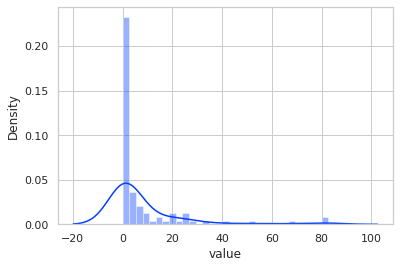

In [4]:
sns.distplot(df2019.value)

<AxesSubplot:xlabel='value', ylabel='Density'>

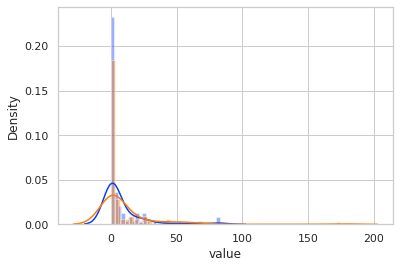

In [5]:
sns.distplot(df2019.value)
sns.distplot(df2018.value)

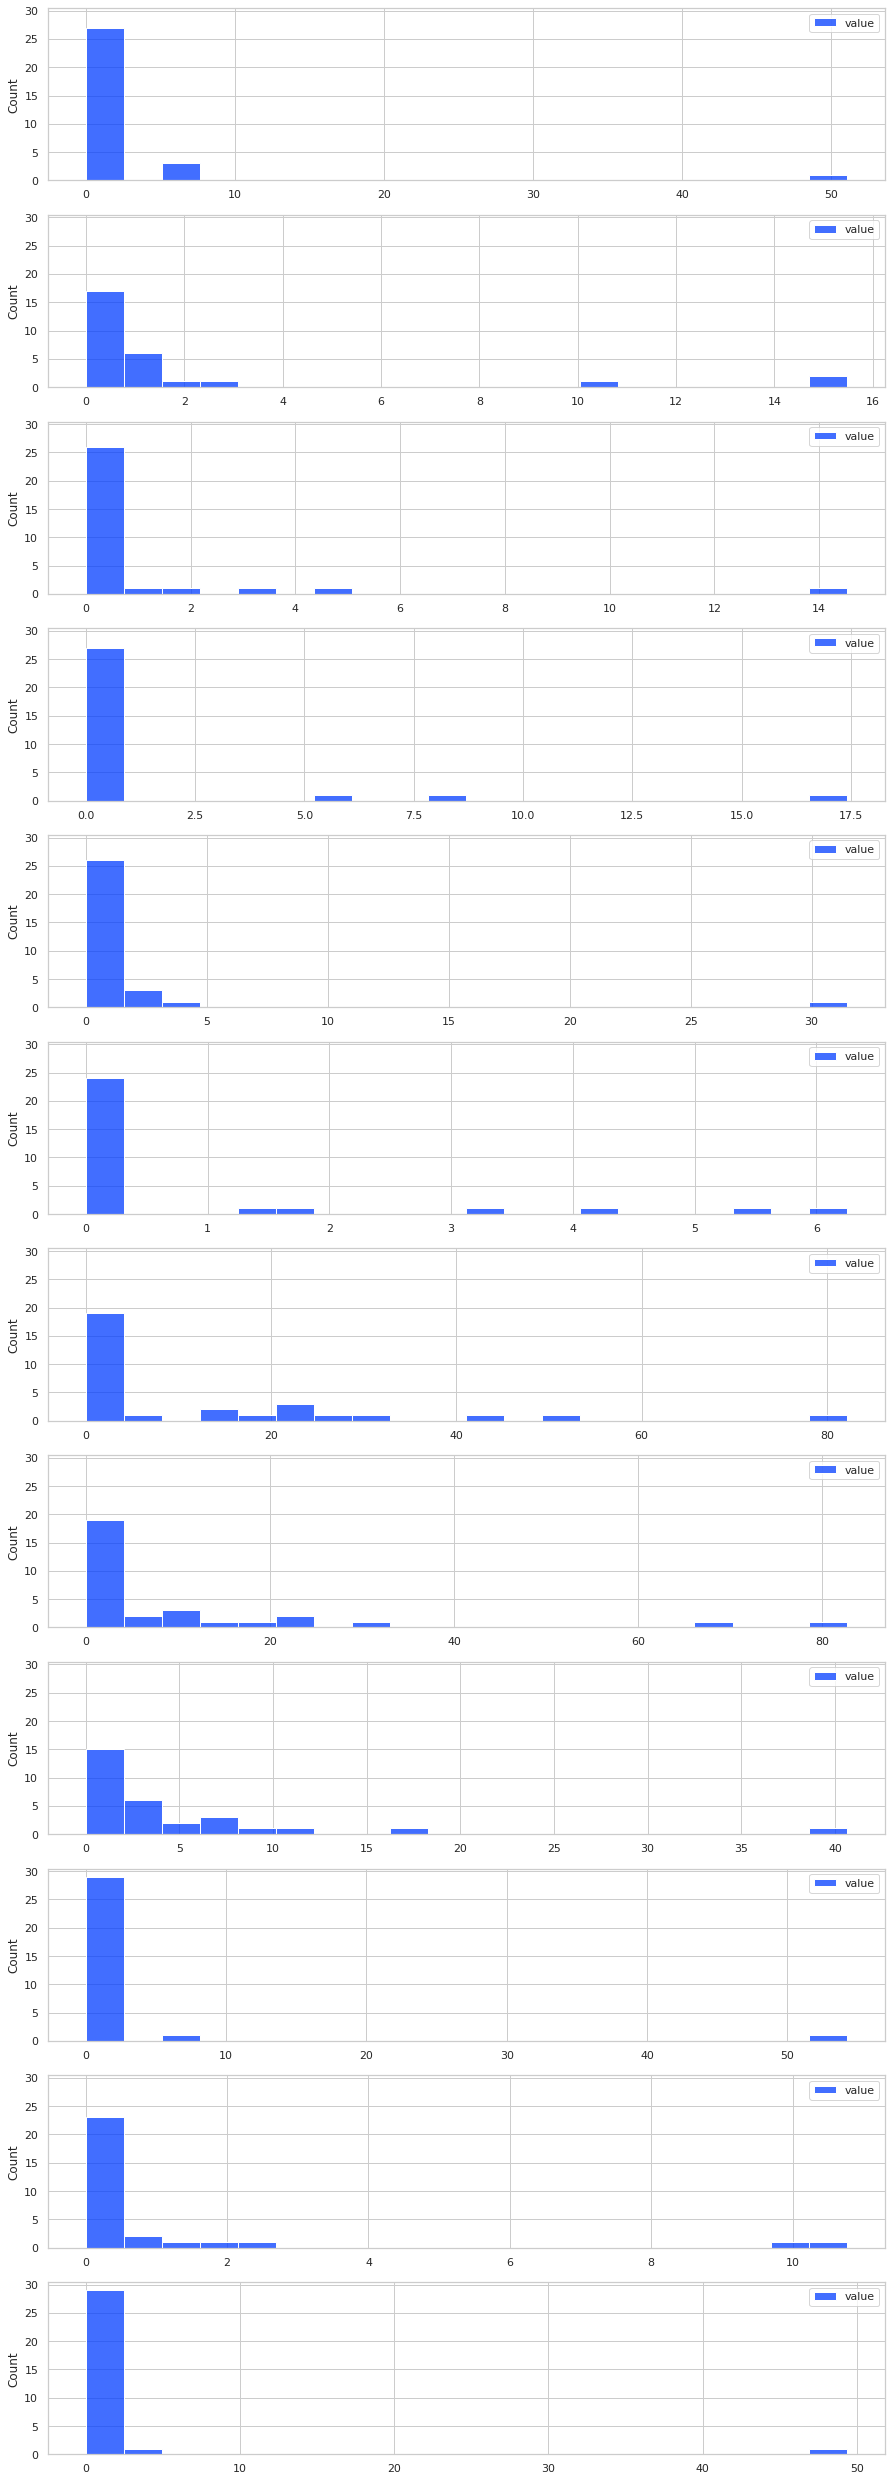

In [6]:
df19 = df[df.date.dt.year == 2019]
fig,ax = plt.subplots(12,1,figsize=(15,45),sharey=True)
for i in range(0,12):
    dfdd = df19[df19.date.dt.month == i+1]
    sns.histplot(dfdd,bins=20,ax=ax[i])


In [7]:
n2018 = np.array(df2018.value)
n2019 = np.array(df2019.value)

n2018 = np.append(n2018,n2019.max())
n2018 = np.append(n2018,n2019.min())

n2019 = np.append(n2019,n2018.max())
n2019 = np.append(n2019,n2018.min())
count1, bin_edges1 = np.histogram(n2018, bins=20)
print(count1)
print(bin_edges1)

[71  5  6  2  2  2  2  2  0  1  0  0  0  0  0  0  0  0  0  1]
[  0.           8.71758679  17.43517358  26.15276037  34.87034716
  43.58793395  52.30552074  61.02310753  69.74069432  78.45828111
  87.1758679   95.8934547  104.61104149 113.32862828 122.04621507
 130.76380186 139.48138865 148.19897544 156.91656223 165.63414902
 174.35173581]


In [8]:
count1, bin_edges1 = np.histogram(n2019, bins=20)
print(count1)
print(bin_edges1)
n2019.max()

[72  6  8  2  1  0  1  1  0  2  0  0  0  0  0  0  0  0  0  1]
[  0.           8.71758679  17.43517358  26.15276037  34.87034716
  43.58793395  52.30552074  61.02310753  69.74069432  78.45828111
  87.1758679   95.8934547  104.61104149 113.32862828 122.04621507
 130.76380186 139.48138865 148.19897544 156.91656223 165.63414902
 174.35173581]


174.35173580926718

In [9]:
df19 = df[df.date.dt.year==2019]

a = np.zeros(shape=(12, 12))
for i in range(0,12):
    for j in range(0,12):
        intersect =[]
        union = []
        dff = df19[df19.date.dt.month == i+1]
        dfj = df19[df19.date.dt.month == j+1]
        n2018 = np.array(dff.value)
        n2019 = np.array(dfj.value)
        n2018 = np.append(n2018,n2019.max())
        n2018 = np.append(n2018,n2019.min())
        n2019 = np.append(n2019,n2018.max())
        n2019 = np.append(n2019,n2018.min())
        count1, bin_edges1 = np.histogram(n2018, bins=20)
        count2, bin_edges2 = np.histogram(n2019, bins=20)
        
        for x in range(count1.shape[0]):
            intersect.append(min(count1[x],count2[x]))
        intersect = np.array([intersect])
        isum = intersect.sum()
        
        for x in range(count1.shape[0]):
            union.append(max(count1[x],count2[x]))
        union = np.array([union])
        usum = union.sum()
        
        jacc1 = isum/usum
        #x = wasserstein_distance(dff.value,dfj.value)
        a[i][j] = jacc1

In [10]:
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.750000,0.833333,0.911765,0.833333,0.857143,0.534884,0.534884,0.444444,0.833333,0.857143,0.833333
1,0.702703,1.000000,0.575000,0.441860,0.750000,0.550000,0.575000,0.575000,0.476190,0.702703,0.675676,0.750000
2,0.783784,0.536585,1.000000,0.756757,0.885714,0.805556,0.534884,0.534884,0.413043,0.833333,0.756757,0.885714
3,0.857143,0.476190,0.805556,1.000000,0.756757,0.777778,0.547619,0.585366,0.454545,0.857143,0.684211,0.805556
4,0.783784,0.800000,0.941176,0.805556,1.000000,0.857143,0.534884,0.534884,0.477273,0.833333,0.911765,0.833333
5,0.857143,0.512195,0.756757,0.729730,0.805556,1.000000,0.511628,0.547619,0.488372,0.805556,0.684211,0.805556
6,0.534884,0.575000,0.534884,0.547619,0.534884,0.547619,1.000000,0.692308,0.585366,0.534884,0.511628,0.500000
7,0.571429,0.615385,0.534884,0.585366,0.534884,0.585366,0.692308,1.000000,0.710526,0.534884,0.547619,0.500000
8,0.413043,0.512195,0.444444,0.454545,0.511628,0.488372,0.547619,0.666667,1.000000,0.413043,0.454545,0.382979
9,0.885714,0.750000,0.885714,0.911765,0.885714,0.857143,0.500000,0.500000,0.444444,1.000000,0.911765,0.941176


In [11]:
df19

,date,value
3287,2019-01-01,0.000
3288,2019-01-02,0.000
3289,2019-01-03,0.000
3290,2019-01-04,0.000
3291,2019-01-05,0.000
...,...,...
3645,2019-12-25,0.004
3646,2019-12-26,0.004
3647,2019-12-27,0.000
3648,2019-12-28,0.000


## Mod

In [12]:
dfm = df.copy()
dfm['value'] = dfm['value'] + 0.5

In [13]:
df19 = dfm[dfm.date.dt.year==2019]

a1 = np.zeros(shape=(12, 12))
for i in range(0,12):
    for j in range(0,12):
        intersect =[]
        union = []
        dff = df19[df19.date.dt.month == i+1]
        dfj = df19[df19.date.dt.month == j+1]
        n2018 = np.array(dff.value)
        n2019 = np.array(dfj.value)
        n2018 = np.append(n2018,n2019.max())
        n2018 = np.append(n2018,n2019.min())
        n2019 = np.append(n2019,n2018.max())
        n2019 = np.append(n2019,n2018.min())
        count1, bin_edges1 = np.histogram(n2018, bins=20)
        count2, bin_edges2 = np.histogram(n2019, bins=20)
        
        for x in range(count1.shape[0]):
            intersect.append(min(count1[x],count2[x]))
        intersect = np.array([intersect])
        isum = intersect.sum()
        
        for x in range(count1.shape[0]):
            union.append(max(count1[x],count2[x]))
        union = np.array([union])
        usum = union.sum()
        
        jacc1 = isum/usum
        #x = wasserstein_distance(dff.value,dfj.value)
        a1[i][j] = jacc1

In [14]:
df19

,date,value
3287,2019-01-01,0.500
3288,2019-01-02,0.500
3289,2019-01-03,0.500
3290,2019-01-04,0.500
3291,2019-01-05,0.500
...,...,...
3645,2019-12-25,0.504
3646,2019-12-26,0.504
3647,2019-12-27,0.500
3648,2019-12-28,0.500


In [15]:
dfw = pd.DataFrame(a1)
cm = sns.light_palette("yellow", as_cmap=True)
s1 = dfw.style.background_gradient(cmap=cm)
s1


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
1,0.909091,1.000000,0.909091,0.771429,0.909091,0.476190,0.050000,0.465116,0.127273,0.211538,0.823529,0.694444
2,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
3,0.756757,0.823529,0.756757,1.000000,0.756757,0.488372,0.120690,0.444444,0.207547,0.226415,0.828571,0.750000
4,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
5,0.477273,0.512195,0.477273,0.488372,0.477273,1.000000,0.413043,0.585366,0.391304,0.547619,0.560976,0.536585
6,0.064516,0.067797,0.064516,0.120690,0.064516,0.382979,1.000000,0.375000,0.382979,0.404255,0.120690,0.103448
7,0.466667,0.500000,0.466667,0.477273,0.466667,0.625000,0.404255,1.000000,0.547619,0.571429,0.511628,0.488372
8,0.140351,0.148148,0.140351,0.207547,0.140351,0.361702,0.382979,0.511628,1.000000,0.511628,0.207547,0.188679
9,0.222222,0.235294,0.222222,0.226415,0.222222,0.511628,0.375000,0.534884,0.477273,1.000000,0.274510,0.280000


In [16]:
s

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
1,0.909091,1.000000,0.909091,0.771429,0.909091,0.476190,0.050000,0.465116,0.127273,0.211538,0.823529,0.694444
2,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
3,0.756757,0.823529,0.756757,1.000000,0.756757,0.488372,0.120690,0.444444,0.207547,0.226415,0.828571,0.750000
4,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
5,0.477273,0.512195,0.477273,0.488372,0.477273,1.000000,0.413043,0.585366,0.391304,0.547619,0.560976,0.536585
6,0.064516,0.067797,0.064516,0.120690,0.064516,0.382979,1.000000,0.375000,0.354167,0.375000,0.120690,0.103448
7,0.466667,0.500000,0.466667,0.477273,0.466667,0.625000,0.404255,1.000000,0.547619,0.571429,0.511628,0.488372
8,0.140351,0.148148,0.140351,0.207547,0.140351,0.361702,0.354167,0.511628,1.000000,0.511628,0.207547,0.188679
9,0.222222,0.235294,0.222222,0.226415,0.222222,0.511628,0.346939,0.534884,0.477273,1.000000,0.274510,0.280000


In [17]:
aa=a-a1
dfw = pd.DataFrame(aa)
cm = sns.light_palette("yellow", as_cmap=True)
ss = dfw.style.background_gradient(cmap=cm)
ss

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.028812,-0.029255,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.028812,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.028061,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
dfm = df.copy()
dfm['value'] = dfm['value'] - 0.01

In [19]:
df19 = dfm[dfm.date.dt.year==2019]

a2 = np.zeros(shape=(12, 12))
for i in range(0,12):
    for j in range(0,12):
        intersect =[]
        union = []
        dff = df19[df19.date.dt.month == i+1]
        dfj = df19[df19.date.dt.month == j+1]
        n2018 = np.array(dff.value)
        n2019 = np.array(dfj.value)
        n2018 = np.append(n2018,n2019.max())
        n2018 = np.append(n2018,n2019.min())
        n2019 = np.append(n2019,n2018.max())
        n2019 = np.append(n2019,n2018.min())
        count1, bin_edges1 = np.histogram(n2018, bins=20)
        count2, bin_edges2 = np.histogram(n2019, bins=20)
        
        for x in range(count1.shape[0]):
            intersect.append(min(count1[x],count2[x]))
        intersect = np.array([intersect])
        isum = intersect.sum()
        
        for x in range(count1.shape[0]):
            union.append(max(count1[x],count2[x]))
        union = np.array([union])
        usum = union.sum()
        
        jacc1 = isum/usum
        #x = wasserstein_distance(dff.value,dfj.value)
        a2[i][j] = jacc1

In [20]:
df19

,date,value
3287,2019-01-01,-0.010
3288,2019-01-02,-0.010
3289,2019-01-03,-0.010
3290,2019-01-04,-0.010
3291,2019-01-05,-0.010
...,...,...
3645,2019-12-25,-0.006
3646,2019-12-26,-0.006
3647,2019-12-27,-0.010
3648,2019-12-28,-0.010


In [21]:
dfw = pd.DataFrame(a2)
cm = sns.light_palette("yellow", as_cmap=True)
s2 = dfw.style.background_gradient(cmap=cm)
s2

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
1,0.909091,1.000000,0.909091,0.771429,0.909091,0.476190,0.050000,0.465116,0.127273,0.211538,0.823529,0.694444
2,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
3,0.756757,0.823529,0.756757,1.000000,0.756757,0.488372,0.120690,0.444444,0.207547,0.226415,0.828571,0.750000
4,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
5,0.477273,0.512195,0.477273,0.488372,0.477273,1.000000,0.413043,0.585366,0.391304,0.547619,0.560976,0.536585
6,0.064516,0.067797,0.064516,0.120690,0.064516,0.382979,1.000000,0.375000,0.354167,0.375000,0.120690,0.103448
7,0.466667,0.500000,0.466667,0.477273,0.466667,0.625000,0.404255,1.000000,0.547619,0.571429,0.511628,0.488372
8,0.140351,0.148148,0.140351,0.207547,0.140351,0.361702,0.354167,0.511628,1.000000,0.511628,0.207547,0.188679
9,0.222222,0.235294,0.222222,0.226415,0.222222,0.511628,0.346939,0.534884,0.477273,1.000000,0.274510,0.280000


In [22]:
s

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
1,0.909091,1.000000,0.909091,0.771429,0.909091,0.476190,0.050000,0.465116,0.127273,0.211538,0.823529,0.694444
2,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
3,0.756757,0.823529,0.756757,1.000000,0.756757,0.488372,0.120690,0.444444,0.207547,0.226415,0.828571,0.750000
4,1.000000,0.909091,1.000000,0.710526,1.000000,0.444444,0.047619,0.434783,0.120690,0.200000,0.756757,0.641026
5,0.477273,0.512195,0.477273,0.488372,0.477273,1.000000,0.413043,0.585366,0.391304,0.547619,0.560976,0.536585
6,0.064516,0.067797,0.064516,0.120690,0.064516,0.382979,1.000000,0.375000,0.354167,0.375000,0.120690,0.103448
7,0.466667,0.500000,0.466667,0.477273,0.466667,0.625000,0.404255,1.000000,0.547619,0.571429,0.511628,0.488372
8,0.140351,0.148148,0.140351,0.207547,0.140351,0.361702,0.354167,0.511628,1.000000,0.511628,0.207547,0.188679
9,0.222222,0.235294,0.222222,0.226415,0.222222,0.511628,0.346939,0.534884,0.477273,1.000000,0.274510,0.280000


In [23]:
aaa = a2-a
dfw = pd.DataFrame(aaa)
cm = sns.light_palette("yellow", as_cmap=True)
sss = dfw.style.background_gradient(cmap=cm)
sss

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
df19 = df[df.date.dt.year==2019]
df20 = df[df.date.dt.year==2018]

a = np.zeros(shape=(12, 12))
for i in range(0,12):
    for j in range(0,12):
        intersect =[]
        union = []
        dff = df19[df19.date.dt.month == i+1]
        dfj = df20[df20.date.dt.month == j+1]
        n2018 = np.array(dff.value)
        n2019 = np.array(dfj.value)
        n2018 = np.append(n2018,n2019.max())
        n2018 = np.append(n2018,n2019.min())
        n2019 = np.append(n2019,n2018.max())
        n2019 = np.append(n2019,n2018.min())
        count1, bin_edges1 = np.histogram(n2018, bins=20)
        count2, bin_edges2 = np.histogram(n2019, bins=20)
        
        for x in range(count1.shape[0]):
            intersect.append(min(count1[x],count2[x]))
        intersect = np.array([intersect])
        isum = intersect.sum()
        
        for x in range(count1.shape[0]):
            union.append(max(count1[x],count2[x]))
        union = np.array([union])
        usum = union.sum()
        
        jacc1 = isum/usum
        #x = wasserstein_distance(dff.value,dfj.value)
        a[i][j] = jacc1

In [25]:
dfw = pd.DataFrame(a)
cm = sns.light_palette("green", as_cmap=True)
s = dfw.style.background_gradient(cmap=cm)
s

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.909091,1.000000,0.756757,0.609756,0.048387,0.047619,0.047619,0.120690,0.609756,0.666667,1.000000
1,0.909091,1.000000,0.909091,0.823529,0.657895,0.050847,0.050000,0.050000,0.127273,0.657895,0.722222,0.909091
2,1.000000,0.909091,1.000000,0.756757,0.609756,0.048387,0.047619,0.047619,0.120690,0.609756,0.666667,1.000000
3,0.756757,0.823529,0.756757,0.939394,0.710526,0.142857,0.101695,0.120690,0.230769,0.710526,0.777778,0.756757
4,1.000000,0.909091,1.000000,0.756757,0.609756,0.048387,0.047619,0.047619,0.120690,0.609756,0.666667,1.000000
5,0.477273,0.512195,0.477273,0.488372,0.477273,0.641026,0.413043,0.382979,0.600000,0.547619,0.560976,0.477273
6,0.064516,0.067797,0.064516,0.101695,0.064516,0.547619,0.692308,0.500000,0.203704,0.118644,0.101695,0.064516
7,0.466667,0.500000,0.466667,0.477273,0.466667,0.511628,0.500000,0.500000,0.511628,0.500000,0.477273,0.466667
8,0.140351,0.148148,0.140351,0.185185,0.140351,0.391304,0.444444,0.444444,0.280000,0.203704,0.185185,0.140351
9,0.222222,0.235294,0.222222,0.226415,0.222222,0.413043,0.434783,0.434783,0.413043,0.294118,0.274510,0.222222
